In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
train = pd.read_csv('train_8wry4cB.csv')
test = pd.read_csv('test_Yix80N0.csv')
submission = pd.read_csv('sample_submission_opxHi4g.csv')

In [16]:
train.shape, test.shape, submission.shape

((10500, 5), (4500, 4), (4500, 2))

In [17]:
train = train.drop_duplicates()

In [18]:
train.head()

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male


In [19]:
submission.head()

,session_id,gender
0,u12112,female
1,u19725,male
2,u11795,female
3,u22639,female
4,u18034,male


In [20]:
session_id = test['session_id']

In [21]:
train.dtypes

session_id     object
startTime      object
endTime        object
ProductList    object
gender         object
dtype: object

In [22]:
type(train['ProductList'][0])

str

In [23]:
train.isnull().sum()

session_id     0
startTime      0
endTime        0
ProductList    0
gender         0
dtype: int64

In [24]:
train.describe()

,session_id,startTime,endTime,ProductList,gender
count,10500,10500,10500,10500,10500
unique,10500,8815,8803,9402,2
top,u22920,05/12/14 20:23,09/12/14 14:58,A00002/B00002/C00007/D00266/,female
freq,1,5,5,25,8192


female    8192
male      2308
Name: gender, dtype: int64


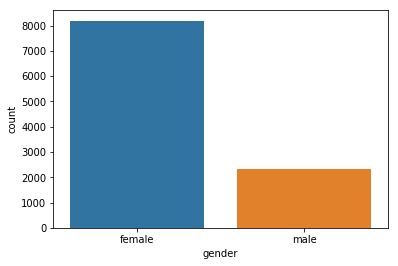

In [25]:
sns.countplot(train['gender'])
print(train['gender'].value_counts())

In [26]:
train.columns

Index(['session_id', 'startTime', 'endTime', 'ProductList', 'gender'], dtype='object')

In [27]:
x = [1,1.2,4]

In [28]:
list(print(type(i)) for i in x );

<class 'int'>
<class 'float'>
<class 'int'>


In [31]:
list(print(type(train[i][0])) for i in train.columns);

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
labelencoder_X = LabelEncoder()
# train['Tag'] = labelencoder_X.fit_transform(train['Tag'])

###  Applying Label Encoder in train data set

In [34]:
for i in train.columns:
    train[i] = labelencoder_X.fit_transform(train[i])

###  0 is for female 1 is for male

In [35]:
train.head()

,session_id,startTime,endTime,ProductList,gender
0,4324,3695,3682,4955,0
1,178,4198,4184,776,1
2,6347,111,123,1670,0
3,3202,7541,7548,5654,0
4,10010,4881,4870,95,1


### Applying label Encoding in test data set 

In [37]:
list(print(type(test[i][0])) for i in test.columns);

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [38]:
for i in test.columns:
    test[i] = labelencoder_X.fit_transform(test[i])

In [39]:
test.head()

,session_id,startTime,endTime,ProductList
0,619,711,690,2185
1,2903,2819,2778,2761
2,537,5,5,1410
3,3784,790,770,2501
4,2388,1780,1763,691


###  Applying Min Max stander

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
X_train = train.drop("gender", axis=1)
Y_train = train["gender"].values

# for the testing 
X_test = test


In [42]:
X_train.shape, Y_train.shape, X_test.shape

((10500, 4), (10500,), (4500, 4))

In [43]:
# min max scaler
min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_train)
X_train = pd.DataFrame(np_scaled)

min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_test)
X_test = pd.DataFrame(np_scaled)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [44]:
X_train.head()

,0,1,2,3
0,0.411849,0.419219,0.418314,0.527072
1,0.016954,0.476288,0.475347,0.082544
2,0.604534,0.012594,0.013974,0.177641
3,0.304981,0.855571,0.857532,0.601425
4,0.953424,0.553778,0.553283,0.010105


In [45]:
X_test.head()

,0,1,2,3
0,0.137586,0.169205,0.166546,0.519496
1,0.645255,0.670871,0.670529,0.656443
2,0.119360,0.001190,0.001207,0.335235
3,0.841076,0.188006,0.185856,0.594627
4,0.530785,0.423608,0.425537,0.164289


### Model Building 

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr = LogisticRegression()

In [48]:
lr.fit(X_train,Y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
pred = lr.predict(X_test)

In [50]:
acc_log = round(lr.score(X_train, Y_train) * 100, 2)
acc_log

78.62

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 

###  Random Forest

In [52]:
X_train.head()

,0,1,2,3
0,0.411849,0.419219,0.418314,0.527072
1,0.016954,0.476288,0.475347,0.082544
2,0.604534,0.012594,0.013974,0.177641
3,0.304981,0.855571,0.857532,0.601425
4,0.953424,0.553778,0.553283,0.010105


In [53]:
from sklearn.ensemble import RandomForestClassifier
  
 # create regressor object 
regressor = RandomForestClassifier(n_estimators = 100, random_state = 52) 
  
# fit the regressor with x and y data 
regressor.fit(X_train, Y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=52, verbose=0, warm_start=False)

In [54]:
Y_pred = regressor.predict(X_test)
acc_log = round(regressor.score(X_train, Y_train) * 100, 2)
acc_log

100.0

In [43]:
#random forest

# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 60, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100,120,140,160]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10,20,40,60]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [39]:
len(session_id),  len(Y_pred)

(4500, 4500)

In [40]:
submission.shape

(4500, 2)

In [44]:
clf = RandomizedSearchCV(regressor,random_grid , n_jobs=-1, 
                   cv=5,
#                          scoring='roc_auc',
                   verbose=2, refit=True)

In [45]:
clf.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 10.4min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=52, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [100, 227, 354, 481, 609, 736, 863, 990, 1118, 1245, 1372, 1500], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 16, 27, 38, 49, 60], 'min_samples_split': [2, 5, 10, 15, 100, 120, 140, 160], 'min_samples_leaf': [1, 2, 5, 10, 20, 40, 60]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [46]:
Y_pred = clf.predict(X_test)

In [48]:
Y_pred

array([0, 0, 0, ..., 0, 1, 0])

### Solution Checker 

In [ ]:
# Y_pred = model.predict(X_test)
# acc_log = round(model.score(X_train, Y_train) * 100, 2)
# acc_log

In [49]:
Y_pred

array([0, 0, 0, ..., 0, 1, 0])

### 

### Change 0 to female and 1 to male 

In [51]:
y = Y_pred

In [52]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [54]:
y = y.astype('str')
    

In [57]:
for i in range(len(y)):
    if y[i] == '0':
        y[i] = 'female'
    elif y[i] == "1":
        y[i] = 'male'

### Make Submission file 

In [60]:
submission = pd.DataFrame({
    'session_id':session_id,
    "gender":y
})

In [61]:
submission.to_csv("submission.csv",index=False)

###  This is my First Approch and i Got  0.8733333333 Score on that time i got #Rank 1

#### I just upload my first approch in the competition

### Second Try (Just Try with Some Feature Selection )

In [73]:
data = pd.read_csv('train_8wry4cB.csv')
data.head()

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male


### Converting starTime and endTime into datetime format and splitting them into columns

In [57]:
data['start_datetime'] = pd.to_datetime(data['startTime'])
data['end_datetime'] = pd.to_datetime(data['endTime'])

In [58]:
data.head()

,session_id,startTime,endTime,ProductList,gender,start_datetime,end_datetime
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,2014-12-15 18:11:00,2014-12-15 18:12:00
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,2014-12-16 14:35:00,2014-12-16 14:41:00
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female,2014-01-12 15:58:00,2014-01-12 15:58:00
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,2014-11-23 02:57:00,2014-11-23 03:00:00
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,2014-12-17 16:44:00,2014-12-17 16:46:00


In [61]:
data['start_date'] = [i.date() for i in data['start_datetime']]
data['start_time'] = [i.time() for i in data['start_datetime']]
data['end_date'] = [i.date() for i in data['end_datetime']]
data['end_time'] = [i.time() for i in data['end_datetime']]

In [62]:
data.head()

,session_id,startTime,endTime,ProductList,gender,start_datetime,end_datetime,start_date,start_time,end_date,end_time
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,2014-12-15 18:11:00,2014-12-15 18:12:00,2014-12-15,18:11:00,2014-12-15,18:12:00
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,2014-12-16 14:35:00,2014-12-16 14:41:00,2014-12-16,14:35:00,2014-12-16,14:41:00
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female,2014-01-12 15:58:00,2014-01-12 15:58:00,2014-01-12,15:58:00,2014-01-12,15:58:00
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,2014-11-23 02:57:00,2014-11-23 03:00:00,2014-11-23,02:57:00,2014-11-23,03:00:00
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,2014-12-17 16:44:00,2014-12-17 16:46:00,2014-12-17,16:44:00,2014-12-17,16:46:00


In [63]:
data.drop(['startTime', 'endTime', 'start_datetime', 'end_datetime'], axis=1, inplace=True)

In [64]:
data['start_Y'] = data['start_date'].apply(lambda x: x.year)
data['start_M'] = data['start_date'].apply(lambda x: x.month)
data['start_D'] = data['start_date'].apply(lambda x: x.day)
data['end_Y'] = data['end_date'].apply(lambda x: x.year)
data['end_M'] = data['end_date'].apply(lambda x: x.month)
data['end_D'] = data['end_date'].apply(lambda x: x.day)
data.drop(['start_date', 'end_date'], axis=1, inplace=True)

### ,.,

In [67]:
data_time = "2014-12-15 18:11:00"

In [74]:
check = pd.to_datetime(data_time)

In [81]:
check.year, check.second, check.minute, check.hour, check.day, check.month

(2014, 0, 11, 18, 15, 12)

###  ,..

In [65]:
data['start_hour'] = data['start_time'].apply(lambda x: x.hour)
data['start_min'] = data['start_time'].apply(lambda x: x.minute)
data['start_sec'] = data['start_time'].apply(lambda x: x.second)
data['end_hour'] = data['end_time'].apply(lambda x: x.hour)
data['end_min'] = data['end_time'].apply(lambda x: x.minute)
data['end_sec'] = data['end_time'].apply(lambda x: x.second)
data.drop(['start_time', 'end_time'], axis=1, inplace=True)

In [66]:
data.head()

,session_id,ProductList,gender,start_Y,start_M,start_D,end_Y,end_M,end_D,start_hour,start_min,start_sec,end_hour,end_min,end_sec
0,u16159,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,2014,12,15,2014,12,15,18,11,0,18,12,0
1,u10253,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,2014,12,16,2014,12,16,14,35,0,14,41,0
2,u19037,A00002/B00001/C00020/D16944/,female,2014,1,12,2014,1,12,15,58,0,15,58,0
3,u14556,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,2014,11,23,2014,11,23,2,57,0,3,0,0
4,u24295,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,2014,12,17,2014,12,17,16,44,0,16,46,0
